In [1]:
# import packages
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from scipy.optimize import fsolve
import scipy.stats as stats

import statsmodels.api as sm
import matplotlib.pyplot as plt
from functools import partial

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Use Python to answer the following questions. Show the code and provide complete sentences as your answers. Submit the .ipynb to Canvas. 

# Q1

If the weekly sales quantity of a product follows a Normal distribution with $\mu = 100$ and $\sigma = 10$.

a) What is the probalitiy that the sales quantity is between 90 and 95 in a week?   
b) What is the minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout (sales greater than inventory) is less than 10%?

In [5]:
# Solution fo 1. a) What is the probalitiy that the sales quantity is between 90 and 95 in a week?
from scipy.special import ndtr as ndtr
import pandas as pd
np.random.seed (8)

import random

mu,sig=100,10 # given parameters
high=95         #probalitiy that the sales quantity is between 90 and 95 in a week, so
low=90

highScore=(high-mu)/sig
lowScore=(low-mu)/sig

norm_dist = np.random.normal(mu, sig, high)

In [6]:
prob1=1-ndtr(highScore)
prob2=1-ndtr(lowScore)
prob=prob2-prob1

print ("Probalitiy that the sales quantity is between 90 and 95 in a week is ",prob)

Probalitiy that the sales quantity is between 90 and 95 in a week is  0.1498822847945298


In [7]:
#Solution for 1. b) What is the minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout (sales greater than inventory) is less than 10%?
mean = 100
inventory_quantity= 0.9*mean
print("minimum quantity the manager should keep in the inventory is ",inventory_quantity)

minimum quantity the manager should keep in the inventory is  90.0


# Q2
Suppose that in Hoboken, the number of traffic accidents can be approximated by a Poisson distribution with λ = 2.5 per month. 

a) What is the probability of five or more than five traffic accidents in one month?   
b) What is the median number of traffic accidents in one month?

In [8]:
# Solution for 2 a) What is the probability of five or more than five traffic accidents in one month?


from scipy.stats import poisson
# given lmbda = 2.5  
prob =1-poisson.pmf(k=5,mu=2.5)
print("The probability of five or more than five traffic accidents in one month is ",prob)

The probability of five or more than five traffic accidents in one month is  0.9331990571094573


In [9]:
# Solution for 2 b) What is the median number of traffic accidents in one month?
mu=2.5
results_1 = stats.poisson.ppf(0.5, mu = 2.5)
stats.poisson.cdf(2, mu = 2.5)


0.5438131158833297

In [10]:
print("When cdf(poisson) is calculated for",results_1,"which is the middle sample,it does not yield a 50% beacuse poisson distribution deals with discrete values.So, the median number of traffic accidents in one month is: ", results_1)
results_1

When cdf(poisson) is calculated for 2.0 which is the middle sample,it does not yield a 50% beacuse poisson distribution deals with discrete values.So, the median number of traffic accidents in one month is:  2.0


2.0

# Q3.

Assuming that the following data (raw_data_hw) is generated by a Beta distribution, find the MLE for a and b.

Hints: 
1. You need to use the [scipy.stats.beta class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).  
2. The 'true' parameters are a = 4, b = 2. You estimates shouldn't be far off. 

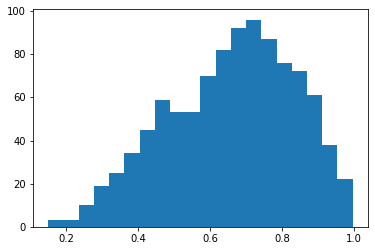

In [11]:
raw_data_hw = np.loadtxt('https://fmai-teaching.s3.amazonaws.com/bia652/est/b.txt')
histogram = plt.hist(raw_data_hw, bins=20)

In [ ]:
raw_data_hw

In [12]:
def negLL_beta(params, raw_data): # how likely is it that the model generates the required data
    
    alpha, beta = params[0], params[1]
    LL = np.sum(stats.beta.logpdf(raw_data, alpha, beta)) 
    negLL = -LL
    #logpdf(x, a, b, loc=0, scale=1)
    #
    return(negLL)

In [14]:
result = minimize(partial(negLL_beta, raw_data=raw_data_hw), x0 = (0, 1), method = 'Nelder-Mead', options={'disp': True})

print("\n",
      "The parameters we get of beta distribution data from MLE are: ", "\n", 
      "So Estimated alpha: ",result['x'][0],", beta : ",result['x'][1], "\n",
      "is close to actual alpha : 4, beta: 2") 

Optimization terminated successfully.
         Current function value: -365.424546
         Iterations: 73
         Function evaluations: 136

 The parameters we get of beta distribution data from MLE are:  
 So Estimated alpha:  4.080323146060941 , beta :  2.093581799333127 
 is close to actual alpha : 4, beta: 2
